In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1, as_frame = False)


In [ ]:
X=mnist["data"]
y=mnist["target"]
X.shape

(70000, 784)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y.shape

(70000,)

In [ ]:
dig = X[0]
img = dig.reshape(28,28)

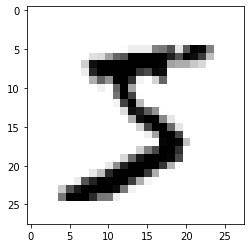

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap=plt.cm.binary)

In [ ]:
y[0]

'5'

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train,X_test,y_train,y_test = X[:60000], X[60000:],y[:60000],y[60000:]

In [ ]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd.predict([dig])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
y_scores=cross_val_score(sgd,X_train,y_train_5,cv=3,scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_5_predicted = cross_val_predict(sgd,X_train,y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_5_predicted)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_5_predicted)

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_5_predicted)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_5_predicted)

0.7325171197343846

In [ ]:
y_score= sgd.decision_function([x])
threshold = 5000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
from sklearn.metrics import roc_curve

false_pr, true_pr, thresholds = roc_curve(y_train_5, y_scores)